# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

weather_api_key

In [18]:
!pip install citipy


### Generate the Cities List by Using the `citipy` Library

In [19]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = url + "q=" + city + "&appid=" + api_key
    city_url = url + "q=" + city + "&appid=" + weather_api_key + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]  
        
#         city_lat = # YOUR CODE HERE
#         city_lng = # YOUR CODE HERE
#         city_max_temp = # YOUR CODE HERE
#         city_humidity = # YOUR CODE HERE
#         city_clouds = # YOUR CODE HERE
#         city_wind = # YOUR CODE HERE
#         city_country = # YOUR CODE HERE
#         city_date = # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | ellsworth
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | marcona
City not found. Skipping...
Processing Record 8 of Set 1 | olafsvik
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | yumen
Processing Record 11 of Set 1 | reftinskiy
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | bambous virieux
Processing Record 15 of Set 1 | dolbeau
City not found. Skipping...
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | hasaki
Processing Record 18 of Set 1 | kosai
Processing Record 19 of Set 1 | samusu
City not found. Skipping...
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | kait

Processing Record 38 of Set 4 | coihaique
City not found. Skipping...
Processing Record 39 of Set 4 | alofi
City not found. Skipping...
Processing Record 40 of Set 4 | grajau
City not found. Skipping...
Processing Record 41 of Set 4 | toora-khem
City not found. Skipping...
Processing Record 42 of Set 4 | ponta do sol
City not found. Skipping...
Processing Record 43 of Set 4 | saint-augustin
City not found. Skipping...
Processing Record 44 of Set 4 | teguldet
City not found. Skipping...
Processing Record 45 of Set 4 | muros
City not found. Skipping...
Processing Record 46 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 47 of Set 4 | uyutne
Processing Record 48 of Set 4 | guerrero negro
Processing Record 49 of Set 4 | naze
Processing Record 0 of Set 5 | nishihara
Processing Record 1 of Set 5 | saint anthony
Processing Record 2 of Set 5 | kodiak
Processing Record 3 of Set 5 | codrington
Processing Record 4 of Set 5 | komsomolskiy
Processing Record 5 of Set 5 | la rong

Processing Record 20 of Set 8 | manambrag
City not found. Skipping...
Processing Record 21 of Set 8 | thompson
Processing Record 22 of Set 8 | mangrol
Processing Record 23 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 24 of Set 8 | christchurch
Processing Record 25 of Set 8 | alyangula
Processing Record 26 of Set 8 | abonnema
Processing Record 27 of Set 8 | skibbereen
Processing Record 28 of Set 8 | griffith
Processing Record 29 of Set 8 | olinda
Processing Record 30 of Set 8 | bud
Processing Record 31 of Set 8 | hihifo
City not found. Skipping...
Processing Record 32 of Set 8 | jorpeland
Processing Record 33 of Set 8 | yulara
Processing Record 34 of Set 8 | kibaya
Processing Record 35 of Set 8 | ca mau
Processing Record 36 of Set 8 | ahipara
Processing Record 37 of Set 8 | douglas
Processing Record 38 of Set 8 | guarapari
Processing Record 39 of Set 8 | huanren
Processing Record 40 of Set 8 | palmer
Processing Record 41 of Set 8 | wuwei
Processing Record 42 of Set 

Processing Record 4 of Set 12 | sabya
Processing Record 5 of Set 12 | boma
Processing Record 6 of Set 12 | privokzalnyy
City not found. Skipping...
Processing Record 7 of Set 12 | banda aceh
Processing Record 8 of Set 12 | half moon bay
Processing Record 9 of Set 12 | bajos de haina
Processing Record 10 of Set 12 | ayan
Processing Record 11 of Set 12 | miedzychod
Processing Record 12 of Set 12 | kano
Processing Record 13 of Set 12 | tshane
Processing Record 14 of Set 12 | lunavada
Processing Record 15 of Set 12 | huilong
Processing Record 16 of Set 12 | erenhot
Processing Record 17 of Set 12 | hervey bay
Processing Record 18 of Set 12 | lompoc
Processing Record 19 of Set 12 | george
Processing Record 20 of Set 12 | shankargarh
Processing Record 21 of Set 12 | kobojango
City not found. Skipping...
Processing Record 22 of Set 12 | calabozo
Processing Record 23 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 24 of Set 12 | mount darwin
Processing Record 25 of Set 12 | ka

In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          540
Lat           540
Lng           540
Max Temp      540
Humidity      540
Cloudiness    540
Wind Speed    540
Country       540
Date          540
dtype: int64

In [22]:
# Display sample data
 
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.0707,172.7902,27.31,80,100,9.24,KI,1675730744
1,mataura,-46.1927,168.8643,13.37,97,100,2.11,NZ,1675730704
2,hermanus,-34.4187,19.2345,21.56,94,83,1.57,ZA,1675730744
3,georgetown,5.4112,100.3354,25.96,94,20,0.51,MY,1675730745
4,ellsworth,44.5434,-68.4195,-1.33,65,0,7.72,US,1675730745


In [44]:
#Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID") 



In [45]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,butaritari,3.0707,172.7902,27.31,80,100,9.24,KI,1675730744
1,mataura,-46.1927,168.8643,13.37,97,100,2.11,NZ,1675730704
2,hermanus,-34.4187,19.2345,21.56,94,83,1.57,ZA,1675730744
3,georgetown,5.4112,100.3354,25.96,94,20,0.51,MY,1675730745
4,ellsworth,44.5434,-68.4195,-1.33,65,0,7.72,US,1675730745


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

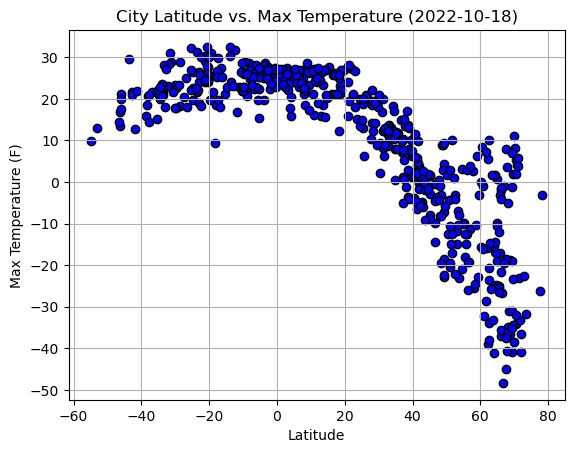

In [26]:
# # Build scatter plot for latitude vs. temperature
# # YOUR CODE HERE

# # Incorporate the other graph properties
# # YOUR CODE HERE

# # Save the figure
# plt.savefig("output_data/Fig1.png")

# # Show plot
# plt.show()

# import matplotlib.pyplot as plt



# # Sample data
# latitude = [-60,-40,-20,0,20,40,60,80]
# temperature = [-40,-20,0,20,40,60]

# # Create the plot
# plt.scatter(latitude, temperature, marker="o", facecolors="b", edgecolors="black")

# # Add title and labels
# plt.title("Latitude vs. Temperature")
# plt.xlabel("Latitude")
# plt.ylabel("Temperature (°C)")

# # Save the figure
# plt.savefig("output_data/Fig1.png")

# # Show plot
# plt.show()

# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(x=city_data_df["Lat"], y= city_data_df["Max Temp"], facecolor="b", edgecolors="black")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.grid()


# Save the figure
#plt.savefig("output/Fig1.png")

# Show plot
plt.show()




#### Latitude Vs. Humidity

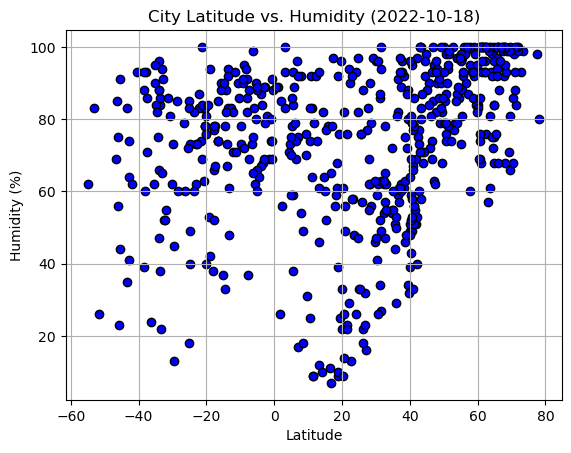

In [176]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

plt.scatter(x=city_data_df["Lat"], y= city_data_df["Humidity"], facecolor="b", edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid()


# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

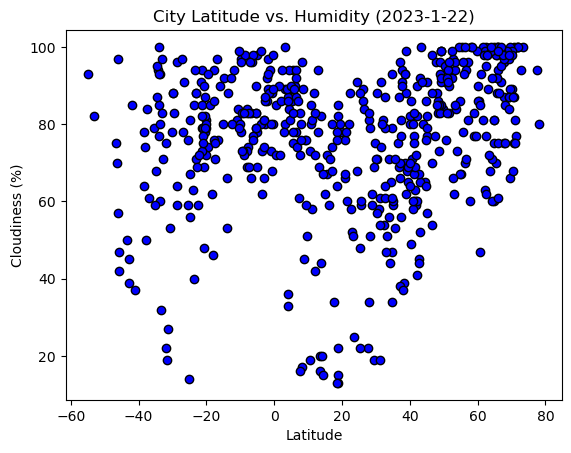

In [27]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(x=city_data_df["Lat"], y= city_data_df["Humidity"], facecolor="b", edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE

# Sample data
latitude = [-60, -40, -20, 0, 20, 40, 60, 80]
cloudiness = [0, 20, 40, 60, 80, 100]

# Create the plot

# Add title and labels

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Humidity (2023-1-22)")


# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

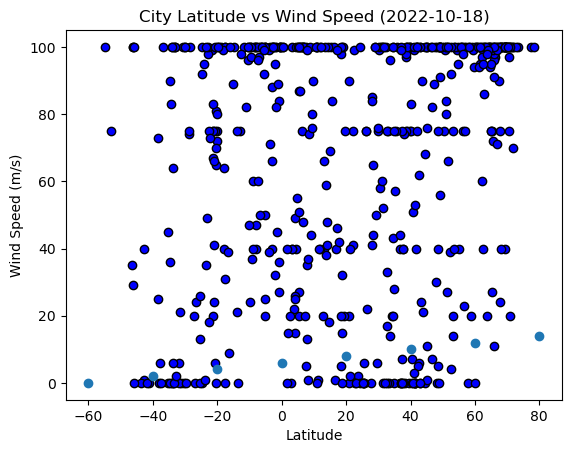

In [28]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

import matplotlib.pyplot as plt
plt.scatter(x=city_data_df["Lat"], y= city_data_df["Cloudiness"], facecolor="b", edgecolors="black")

# Sample data
lat = [-60, -40, -20, 0, 20, 40, 60, 80]
wind_speed = [0,2,4,6,8,10,12,14]

# Build the scatter plot
plt.scatter(lat, wind_speed)

# Set the x and y axis labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Incorporate other graph properties
plt.title("City Latitude vs Wind Speed (2022-10-18)")


# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def create_linear_regression_plot(x, y, title, xlabel, ylabel, file_name):
    data = pd.DataFrame({'x': x, 'y': y})
    sns.regplot(x='x', y='y', data=data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(file_name)
    plt.show()


In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.0707,172.7902,27.31,80,100,9.24,KI,1675730744
3,georgetown,5.4112,100.3354,25.96,94,20,0.51,MY,1675730745
4,ellsworth,44.5434,-68.4195,-1.33,65,0,7.72,US,1675730745
6,olafsvik,64.8945,-23.7142,0.73,60,100,18.79,IS,1675730746
7,kapaa,22.0752,-159.3190,27.18,80,75,6.69,US,1675730692


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,mataura,-46.1927,168.8643,13.37,97,100,2.11,NZ,1675730704
2,hermanus,-34.4187,19.2345,21.56,94,83,1.57,ZA,1675730744
5,east london,-33.0153,27.9116,23.17,83,100,3.07,ZA,1675730746
10,avarua,-21.2078,-159.7750,29.03,79,20,4.63,CK,1675730747
11,port alfred,-33.5906,26.8910,21.77,93,100,0.45,ZA,1675730747


###  Temperature vs. Latitude Linear Regression Plot

rvalue is -0.8502168235257936


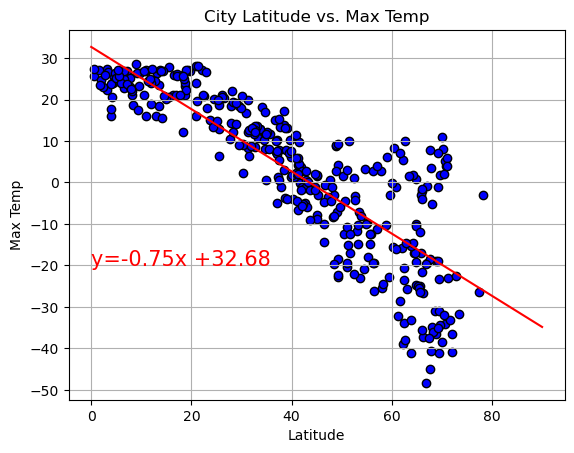

In [34]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

def lineregress(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression_analysis = pd.DataFrame({"slope":[slope], "intercept":[intercept], "rvalue":[rvalue], "pvalue":[pvalue], "stderr":[stderr]})
    return print(f"rvalue is {rvalue}"), regression_analysis






regression_analysis = lineregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
regression_analysis_df = regression_analysis [1]

x_axis= np.arange(0,100,10)
regress_value = regression_analysis_df["slope"][0] * x_axis + regression_analysis_df["intercept"][0]
regression_analysis_df
regress_value
plt.scatter(x=northern_hemi_df["Lat"], y= northern_hemi_df["Max Temp"], facecolor="b", edgecolors="black")
plt.plot(x_axis, regress_value, c="r")
line_eq = "y=" + str(round(regression_analysis_df["slope"][0],2)) + "x +" + str(round(regression_analysis_df["intercept"][0],2))
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("City Latitude vs. Max Temp")
plt.grid()




rvalue is 0.4247352973795101


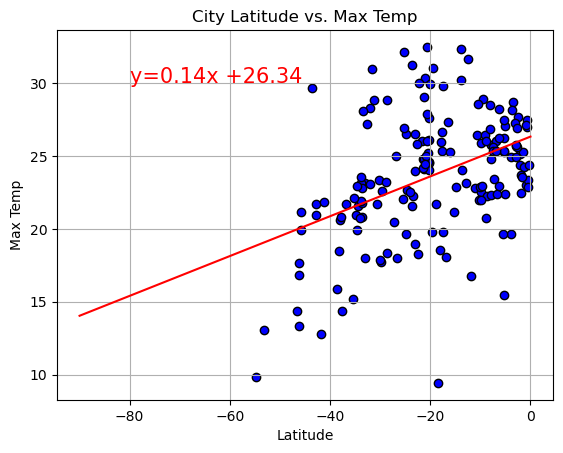

In [35]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

regression_analysis = lineregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regression_analysis_df = regression_analysis [1]

x_axis= np.arange(-90,10,10)
regress_value = regression_analysis_df["slope"][0] * x_axis + regression_analysis_df["intercept"][0]

plt.scatter(x=southern_hemi_df["Lat"], y= southern_hemi_df["Max Temp"], facecolor="b", edgecolors="black")
plt.plot(x_axis, regress_value, c="r")
line_eq = "y=" + str(round(regression_analysis_df["slope"][0],2)) + "x +" + str(round(regression_analysis_df["intercept"][0],2))
plt.annotate(line_eq,(-80,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("City Latitude vs. Max Temp")
plt.grid()



**Discussion about the linear relationship:The tempeture increases as we get closer to latitude 0

### Humidity vs. Latitude Linear Regression Plot

rvalue is 0.37292202663121565


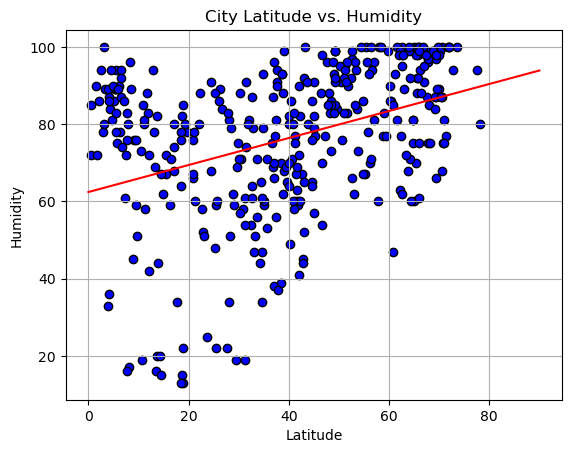

In [36]:
# Northern Hemisphere
# YOUR CODE HERE

regression_analysis = lineregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regression_analysis_df = regression_analysis [1]

x_axis= np.arange(0,100,10)
regress_value = regression_analysis_df["slope"][0] * x_axis + regression_analysis_df["intercept"][0]

plt.scatter(x=northern_hemi_df["Lat"], y= northern_hemi_df["Humidity"], facecolor="b", edgecolors="black")
plt.plot(x_axis, regress_value, c="r")
line_eq = "y=" + str(round(regression_analysis_df["slope"][0],2)) + "x +" + str(round(regression_analysis_df["intercept"][0],2))
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity")
plt.grid()



rvalue is 0.3294999992630863


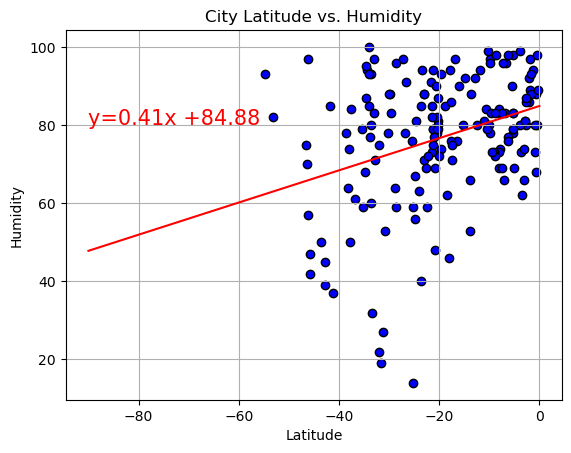

In [37]:
# Southern Hemisphere
# YOUR CODE HERE


regression_analysis = lineregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regression_analysis_df = regression_analysis [1]

x_axis= np.arange(-90,10,10)
regress_value = regression_analysis_df["slope"][0] * x_axis + regression_analysis_df["intercept"][0]

plt.scatter(x=southern_hemi_df["Lat"], y= southern_hemi_df["Humidity"], facecolor="b", edgecolors="black")
plt.plot(x_axis, regress_value, c="r")
line_eq = "y=" + str(round(regression_analysis_df["slope"][0],2)) + "x +" + str(round(regression_analysis_df["intercept"][0],2))
plt.annotate(line_eq,(-90,80),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity")
plt.grid()


**Discussion about the linear relationship:Humidity increases as we get closer to latitude 0 in the northern and southern hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

rvalue is 0.30752480494285295


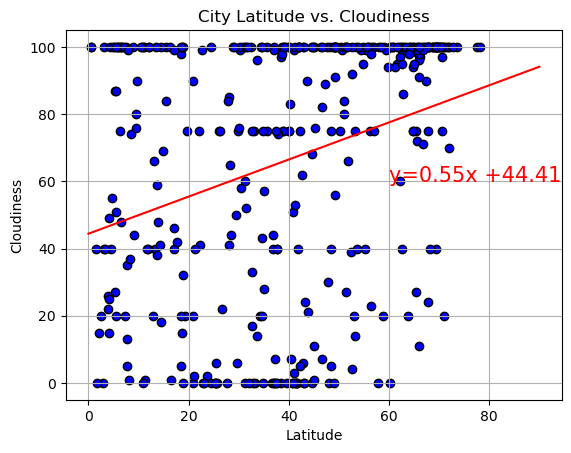

In [38]:
# Northern Hemisphere
# YOUR CODE HERE
regression_analysis = lineregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regression_analysis_df = regression_analysis [1]

x_axis= np.arange(0,100,10)
regress_value = regression_analysis_df["slope"][0] * x_axis + regression_analysis_df["intercept"][0]
regression_analysis_df
regress_value
plt.scatter(x=northern_hemi_df["Lat"], y= northern_hemi_df["Cloudiness"], facecolor="b", edgecolors="black")
plt.plot(x_axis, regress_value, c="r")
line_eq = "y=" + str(round(regression_analysis_df["slope"][0],2)) + "x +" + str(round(regression_analysis_df["intercept"][0],2))
plt.annotate(line_eq,(60,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness")
plt.grid()



rvalue is 0.3559986726764211


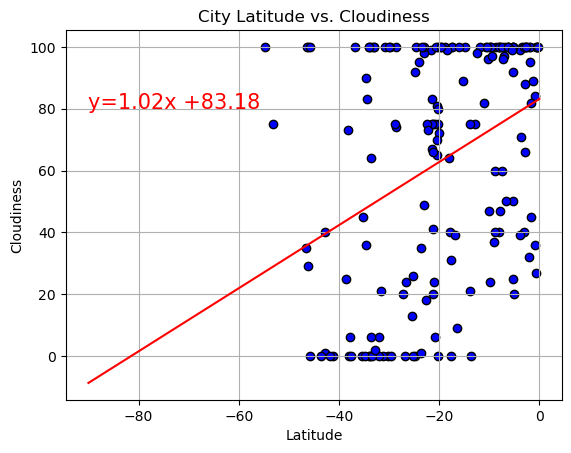

In [40]:
# Southern Hemisphere
# YOUR CODE HERE


regression_analysis = lineregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regression_analysis_df = regression_analysis [1]

x_axis= np.arange(-90,10,10)
regress_value = regression_analysis_df["slope"][0] * x_axis + regression_analysis_df["intercept"][0]

plt.scatter(x=southern_hemi_df["Lat"], y= southern_hemi_df["Cloudiness"], facecolor="b", edgecolors="black")
plt.plot(x_axis, regress_value, c="r")
line_eq = "y=" + str(round(regression_analysis_df["slope"][0],2)) + "x +" + str(round(regression_analysis_df["intercept"][0],2))
plt.annotate(line_eq,(-90,80),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness")
plt.grid()




**Discussion about the linear relationship: there is no correlation between lagtitude and cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

rvalue is 0.11571388952943855


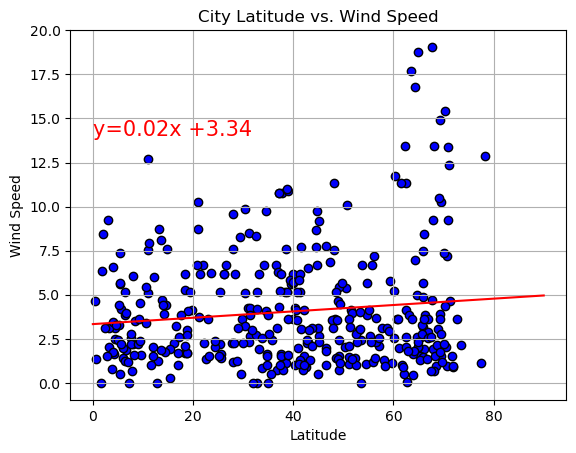

In [41]:
# Northern Hemisphere
# YOUR CODE HERE

regression_analysis = lineregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regression_analysis_df = regression_analysis [1]

x_axis= np.arange(0,100,10)
regress_value = regression_analysis_df["slope"][0] * x_axis + regression_analysis_df["intercept"][0]
regression_analysis_df
regress_value
plt.scatter(x=northern_hemi_df["Lat"], y= northern_hemi_df["Wind Speed"], facecolor="b", edgecolors="black")
plt.plot(x_axis, regress_value, c="r")
line_eq = "y=" + str(round(regression_analysis_df["slope"][0],2)) + "x +" + str(round(regression_analysis_df["intercept"][0],2))
plt.annotate(line_eq,(0,14),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed")
plt.grid()


rvalue is -0.370065438868692


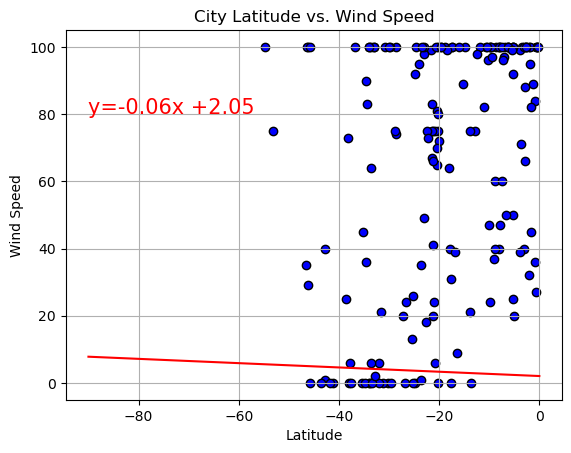

In [42]:
# Southern Hemisphere
# YOUR CODE HERE
regression_analysis = lineregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regression_analysis_df = regression_analysis [1]

x_axis= np.arange(-90,10,10)
regress_value = regression_analysis_df["slope"][0] * x_axis + regression_analysis_df["intercept"][0]

plt.scatter(x=southern_hemi_df["Lat"], y= southern_hemi_df["Cloudiness"], facecolor="b", edgecolors="black")
plt.plot(x_axis, regress_value, c="r")
line_eq = "y=" + str(round(regression_analysis_df["slope"][0],2)) + "x +" + str(round(regression_analysis_df["intercept"][0],2))
plt.annotate(line_eq,(-90,80),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed")
plt.grid()



**Discussion about the linear relationship:No correlation between the latitude and the wind speed